<a href="https://colab.research.google.com/github/Jhow3D/Projetos---An-lise-de-dados/blob/main/Case_Mercado_de_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libs para modelagem dos dados:

import numpy as np 
import pandas as pd

# libs para análise gráfica:

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

# libs para tirar avisos:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Base_dados = pd.read_csv('/content/PS4_GamesSales.csv',encoding='latin-1')

Base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# Dimensão

Base_dados.shape

(1034, 9)

In [ ]:
# nulos 

Base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

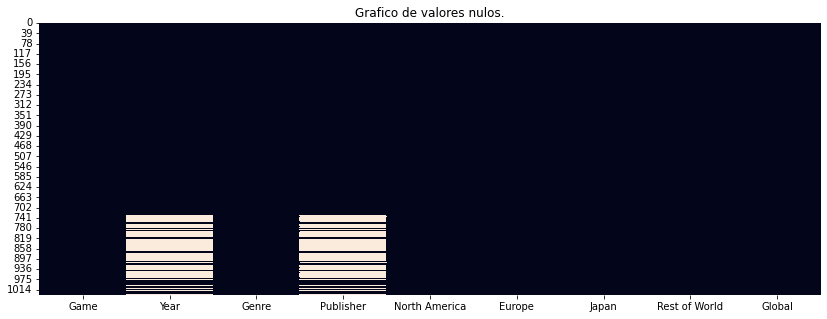

In [ ]:
# Nulos gráficos: 

plt.figure(figsize=(14,5))
plt.title("Grafico de valores nulos.")
sns.heatmap(Base_dados.isnull(), cbar=False);

In [ ]:
# Tirando valores nulos:

Base_dados.dropna(inplace=True)

In [ ]:
# Estatisticas: 

Base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


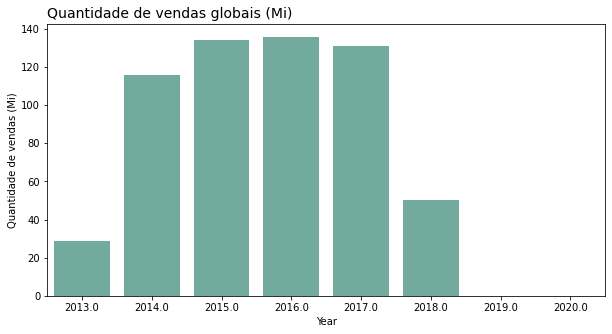

In [ ]:
# Tamanho da imagem:
plt.figure(figsize=(10,5))

#Tamanho do titulo:
plt.title("Quantidade de vendas globais (Mi)",loc='left',fontsize=14)

# Criação do gráfico
sns.barplot(data=Base_dados,x='Year',y='Global',ci=None,color = '#69b3a2',estimator=sum)

# labal
plt.ylabel('Quantidade de vendas (Mi)');

In [ ]:
# Retirando os anos 2019 e 2020

Base_dados = Base_dados.loc[(Base_dados['Year']!=2019) & (Base_dados['Year']!=2020)]
Base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


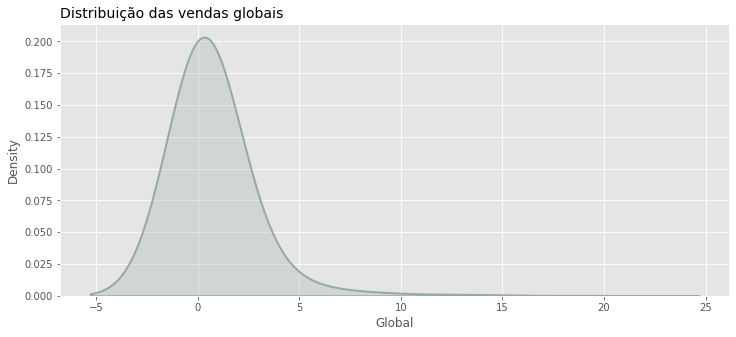

In [ ]:
# Tamanho

plt.figure(figsize=(12,5))

# Estilo 

plt.style.use('ggplot')

# Titulo:
plt.title("Distribuição das vendas globais",loc='left',fontsize=14)
sns.kdeplot(Base_dados['Global'],shade=True,bw=1,color='#96a8a8',linewidth=2);


In [ ]:
Analise = Base_dados.groupby(by=['Year']).sum()

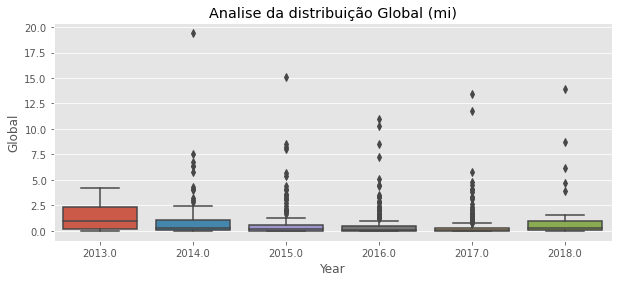

In [ ]:
# Tamanho
plt.figure(figsize=(10,4))

# Titulo
plt.title("Analise da distribuição Global (mi)")

sns.boxplot(data=Base_dados,x='Year',y='Global')

In [ ]:
Analise.reset_index(inplace=True)

In [ ]:
Base_dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Analisando a proporção dos 100% de cada continente:

America = [America / Total * 100 for America, Total in zip(Analise['North America'],Analise['Global'])] # Analise horizontal
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'],Analise['Global'])] # Analise horizontal
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'],Analise['Global'])] # Analise horizontal
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'],Analise['Global'])] # Analise horizontal

America,Europa,Japao,Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

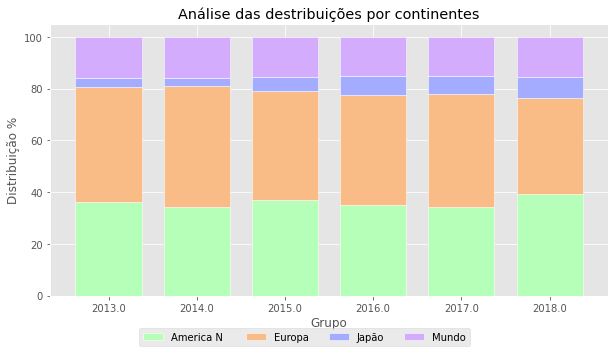

In [ ]:
# Tamanho
plt.figure(figsize=(10,5))

Largura_barra = 0.75 # Largura da barra no gráfico
Rotulos = Analise['Year'] # Rotulos 
Grupos = [0,1,2,3,4,5] 

# titulo:
plt.title("Análise das destribuições por continentes")

# Plot da America
plt.bar(Grupos, America, width= Largura_barra,color='#b5ffb9',edgecolor='white')

# Plot da Europa
plt.bar(Grupos, Europa, bottom = America ,width= Largura_barra,color='#f9bc86',edgecolor='white')

# Plot do Japão 
plt.bar(Grupos, Japao, bottom = [A + B for A, B in zip(America,Europa)] ,width= Largura_barra,color='#a3acff',edgecolor='white')

# Plot do Mundo
plt.bar(Grupos, Mundo, bottom = [A + B + C for A, B, C in zip(America,Europa,Japao)] ,width= Largura_barra,color='#d3acfe',edgecolor='white')

# labels 

plt.xticks(Grupos,Rotulos)
plt.xlabel('Grupo')
plt.ylabel("Distribuição %")

# Legenda

plt.legend(['America N ','Europa','Japão','Mundo'],loc = 'upper left',bbox_to_anchor=(0.15,-0.1),ncol=4);






In [ ]:
Base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:

from sklearn.preprocessing import LabelEncoder

Funcao_Label = LabelEncoder()
Base_dados['Produtor'] = Funcao_Label.fit_transform(Base_dados['Publisher']) # transformando os valores unicos em um código númerico
Base_dados['Genero'] = Funcao_Label.fit_transform(Base_dados['Genre'])
Base_dados['Jogo'] = Funcao_Label.fit_transform(Base_dados['Game'])
Base_dados


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,0,72
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,8,802
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00,34,2,107
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00,17,0,114


In [ ]:
# Paleta de cores

Paleta_Cores = sns.color_palette('husl',8)

Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

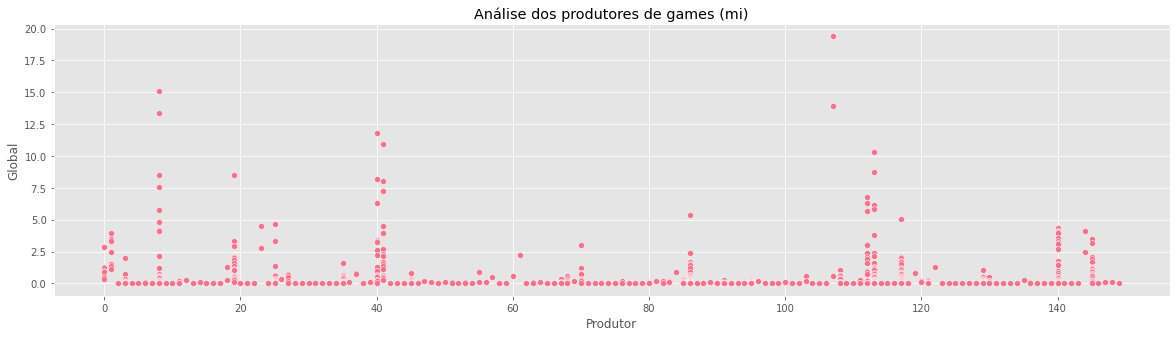

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Análise dos produtores de games (mi)")
sns.scatterplot(data=Base_dados,x='Produtor',y='Global',color=Paleta_Cores[0])

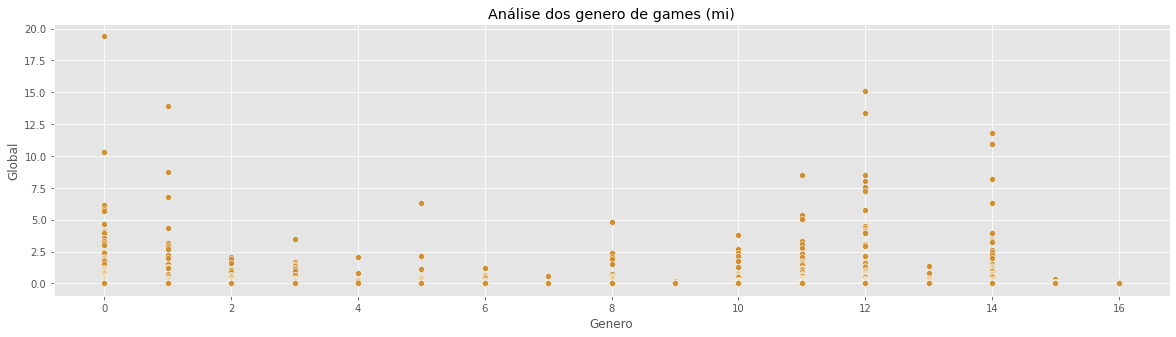

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Análise dos genero de games (mi)")
sns.scatterplot(data=Base_dados,x='Genero',y='Global',color=Paleta_Cores[1])

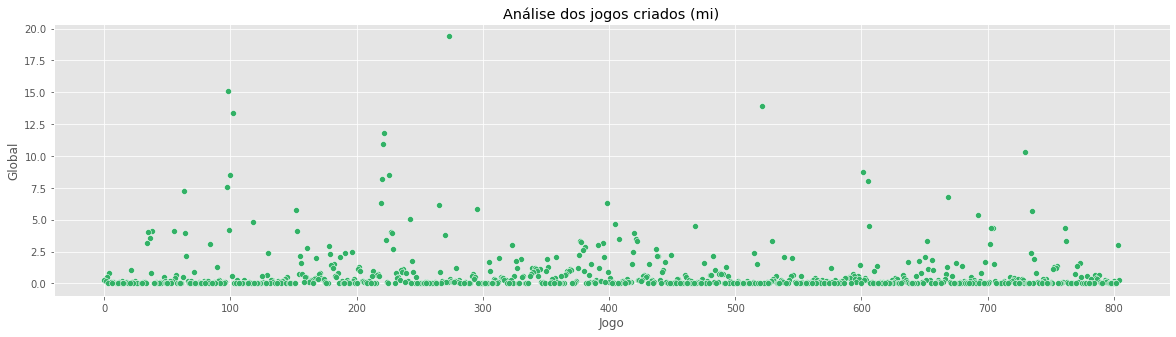

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Análise dos jogos criados (mi)")
sns.scatterplot(data=Base_dados,x='Jogo',y='Global',color=Paleta_Cores[3])

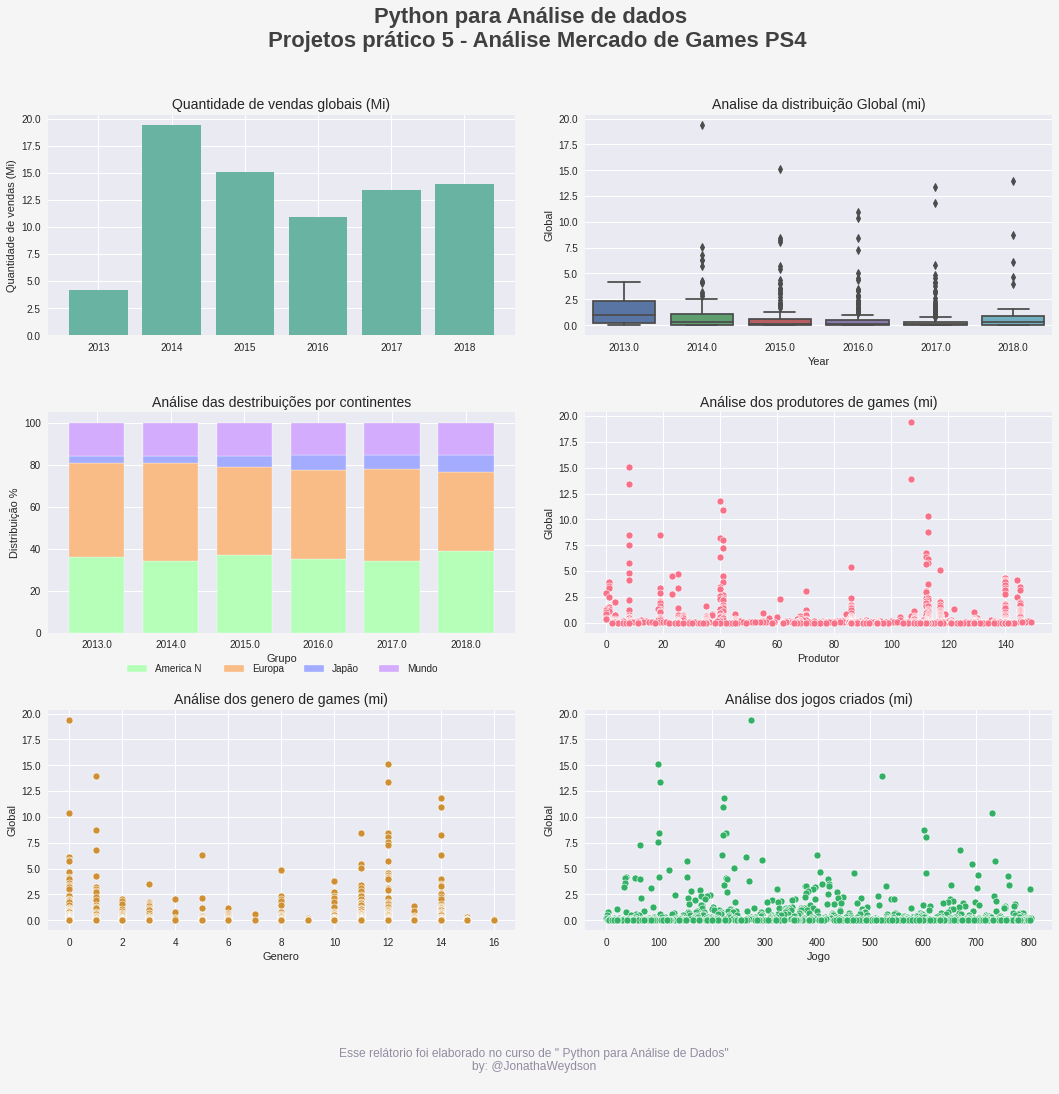

In [ ]:
# Relatorio --> Report para o chefe

# Tamanho da Imagem 
fig, ax= plt.subplots (figsize =(18,15))

# Cor de fundo

Cor_Fundo = '#f5f5f5'
ax.set_facecolor(Cor_Fundo)
fig.set_facecolor(Cor_Fundo)

# Estilo dos gráficos

plt.style.use('seaborn')

plt.suptitle('Python para Análise de dados \n Projetos prático 5 - Análise Mercado de Games PS4',fontsize = 22, color = '#404040',fontweight=600)



# Parametros para o grid
Linhas = 3
Colunas = 2



# Acessando gráficos 1
plt.subplot(Linhas,Colunas,1)
#Tamanho do titulo:
plt.title("Quantidade de vendas globais (Mi)",loc='center',fontsize=14)

# Criação do gráfico
plt.bar(Base_dados['Year'],Base_dados['Global'],color = '#69b3a2')

# labal
plt.ylabel('Quantidade de vendas (Mi)');


# Acessando gráfico 2 
plt.subplot(Linhas,Colunas,2)
# Titulo
plt.title("Analise da distribuição Global (mi)",loc='center',fontsize=14)
sns.boxplot(data=Base_dados,x='Year',y='Global')

# Acessando gráfico 3
plt.subplot(Linhas,Colunas,3)
Largura_barra = 0.75 # Largura da barra no gráfico
Rotulos = Analise['Year'] # Rotulos 
Grupos = [0,1,2,3,4,5] 
# titulo:
plt.title("Análise das destribuições por continentes",loc='center',fontsize=14)
# Plot da America
plt.bar(Grupos, America, width= Largura_barra,color='#b5ffb9',edgecolor='white')
# Plot da Europa
plt.bar(Grupos, Europa, bottom = America ,width= Largura_barra,color='#f9bc86',edgecolor='white')
# Plot do Japão 
plt.bar(Grupos, Japao, bottom = [A + B for A, B in zip(America,Europa)] ,width= Largura_barra,color='#a3acff',edgecolor='white')
# Plot do Mundo
plt.bar(Grupos, Mundo, bottom = [A + B + C for A, B, C in zip(America,Europa,Japao)] ,width= Largura_barra,color='#d3acfe',edgecolor='white')
# labels 
plt.xticks(Grupos,Rotulos)
plt.xlabel('Grupo')
plt.ylabel("Distribuição %")
# Legenda
plt.legend(['America N ','Europa','Japão','Mundo'],loc = 'upper left',bbox_to_anchor=(0.15,-0.1),ncol=4);



# Acessando gráfico 4
plt.subplot(Linhas,Colunas,4)
plt.title("Análise dos produtores de games (mi)",loc='center',fontsize=14)
sns.scatterplot(data=Base_dados,x='Produtor',y='Global',color=Paleta_Cores[0])

# Acessando gráfico 5
plt.subplot(Linhas,Colunas,5)
plt.title("Análise dos genero de games (mi)",loc='center',fontsize=14)
sns.scatterplot(data=Base_dados,x='Genero',y='Global',color=Paleta_Cores[1])

# Acessando gráfico 6
plt.subplot(Linhas,Colunas,6)
plt.title("Análise dos jogos criados (mi)",loc='center',fontsize=14)
sns.scatterplot(data=Base_dados,x='Jogo',y='Global',color=Paleta_Cores[3])

# Ajustar para que um gráfico não sobreponha o outro:

plt.subplots_adjust(hspace=0.35,wspace=0.15)

# Rodapé

Rodpe = '''
Esse relátorio foi elaborado no curso de " Python para Análise de Dados"
by: @JonathaWeydson
'''

# Incluindo o rodape no relátorio
fig.text(0.5,-0.02,Rodpe,ha='center',va='bottom',size=12,color='#938ca1');
